# Get DataSet

In [ ]:
! pip install chembl_webresource_client
#Molecular FInger Print
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

import pandas as pd
import pickle
from chembl_webresource_client.new_client import new_client
import lightgbm


In [ ]:
organism = "Mycobacterium tuberculosis"
target   = "CHEMBL1849"

In [ ]:
# Load Model
with open("modelSet_yay.tan","rb") as file:
  data = pickle.load(file)

model = data["model"]
oriCom = data["oriCom"]
tesCol = data["tesCol"]

### Function

In [ ]:
# Request Data
def getData(target):
  unkData = new_client.activity
  unkData = unkData.filter(target_chembl_id=target)
  unkData = pd.DataFrame.from_dict(unkData)
  n1 = len(unkData)

  # Drop Duplicate
  selected_val = ['molecule_chembl_id','canonical_smiles']
  expData = unkData.drop_duplicates(['canonical_smiles'])
  expData = expData[selected_val]
  expData.dropna(inplace=True)
  expData = expData.reset_index()
  n2 = len(expData)

  print(len(expData))

  # Drop Already Exist Data
  expData = expData.loc[ ~(expData.canonical_smiles.isin(oriCom))]
  n3 = len(expData)

  return expData, (n1, n2, n3)

In [ ]:
def analyse(target):
  expData, x = getData(target)
  print(x)
  data = expData[ ['canonical_smiles','molecule_chembl_id'] ]
  data.to_csv('molecule.smi', sep='\t', index=False, header=False)

  ! bash padel.sh
  fgrData = pd.read_csv('descriptors_output.csv')
  fgrData = fgrData.drop(columns=["Name"])
  fgrData = fgrData[tesCol]
  result = model.predict( fgrData )
  expData["Predicted_pIC50"] = result
  #expData.sort_values("Predicted_pIC50",ascending=False)

  return expData

### Run

In [ ]:
data0 = analyse("CHEMBL1849")   #Enoyl-[acyl-carrier-protein] reductase   |   Mycobacterium tuberculosis  | (1181, 788, 454)
data1 = analyse("CHEMBL1857")   #Enoyl-[acyl-carrier-protein] reductase   |   Escherichia coli K-12       | (194, 162, 161)
data2 = analyse("CHEMBL4150")   #Enoyl-[acyl-carrier-protein] reductase   |   Plasmodium falciparum       | (412, 224, 220)
data3 = analyse("CHEMBL1075024")#Enoyl-[acyl-carrier-protein] reductase   |   Streptococcus pneumoniae    | (56, 42, 41)

788
(1181, 788, 454)
Processing CHEMBL276420 in molecule.smi (1/454). 
Processing CHEMBL217616 in molecule.smi (2/454). 
Processing CHEMBL263248 in molecule.smi (3/454). Average speed: 2.51 s/mol.
Processing CHEMBL385570 in molecule.smi (4/454). Average speed: 1.29 s/mol.
Processing CHEMBL217332 in molecule.smi (5/454). Average speed: 1.15 s/mol.
Processing CHEMBL386691 in molecule.smi (6/454). Average speed: 0.89 s/mol.
Processing CHEMBL386127 in molecule.smi (7/454). Average speed: 0.88 s/mol.
Processing CHEMBL217063 in molecule.smi (8/454). Average speed: 0.74 s/mol.
Processing CHEMBL387464 in molecule.smi (10/454). Average speed: 0.65 s/mol.
Processing CHEMBL214964 in molecule.smi (9/454). Average speed: 0.74 s/mol.
Processing CHEMBL217739 in molecule.smi (11/454). Average speed: 0.62 s/mol.
Processing CHEMBL386417 in molecule.smi (12/454). Average speed: 0.57 s/mol.
Processing CHEMBL217199 in molecule.smi (13/454). Average speed: 0.56 s/mol.
Processing CHEMBL216261 in molecule.smi

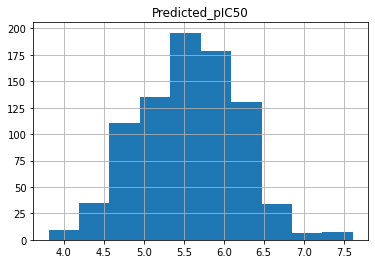

In [17]:
data0 = data0.append(data1)
data0 = data0.append(data2)
data0 = data0.append(data3)
data0 = data0.sort_values("Predicted_pIC50",ascending=False)
data0 = data0.drop_duplicates(['canonical_smiles'])
cek = data0.loc[data0.Predicted_pIC50 > 6.5]
data0.hist(column="Predicted_pIC50")
cek
#comData.hist(column="pIC50")
data0.to_csv("hasil.csv")


In [20]:
len(cek)

46

In [ ]:
data4 = analyse("CHEMBL2150835")   #Enoyl-[acyl-carrier-protein] reductase [NADH]    |   Francisella tularensis subsp. tularensis (strain SCHU S4 / Schu 4)
data5 = analyse("CHEMBL3994")      #Enoyl-[acyl-carrier-protein] reductase (FabI)    |   Staphylococcus aureus
data6 = analyse("CHEMBL1075044")   #Enoyl-[acyl-carrier-protein] reductase [NADH]    |   Bacillus subtilis (strain 168)
data7 = analyse("CHEMBL3308935")   #Enoyl-[acyl-carrier-protein] reductase           |   Pseudomonas aeruginosa


In [ ]:
data4 = data4.append(data5)
data4 = data4.append(data6)
data4 = data4.append(data7)
data4 = data4.sort_values("Predicted_pIC50",ascending=False)
data4 = data4.drop_duplicates(['canonical_smiles'])
data0.head(20)
